# Imports

In [1]:
 # generic data science libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import scikit-learn
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import accuracy_score, classification_report, auc, confusion_matrix, roc_curve

C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


# Gather Data

In [2]:
df = pd.read_csv("train.csv")
df["FamilySize"] = df.SibSp + df.Parch + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


# Explore the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


In [5]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [6]:
df.groupby("Embarked").size()

Embarked
C    168
Q     77
S    644
dtype: int64

# Clean the Data

In [7]:
df["Sex"] = [0 if x == "male" else 1 for x in df.Sex]

df_sub = df.loc[:, ["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize"]]

df_sub.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,0,22.0,7.2500,S,2
1,1,1,1,38.0,71.2833,C,2
2,1,3,1,26.0,7.9250,S,1
3,1,1,1,35.0,53.1000,S,2
4,0,3,0,35.0,8.0500,S,1


In [8]:
# Fill NA
df_sub["Age"] = df_sub.Age.fillna(df_sub.Age.mean())
df_sub["Embarked"] = df_sub.Embarked.fillna("S")

df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    891 non-null    object 
 6   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [9]:
df_sub["Pclass"] = [str(x) for x in df_sub.Pclass]

# get dums
dums_linear = pd.get_dummies(df_sub.loc[:, ["Pclass", "Embarked"]], drop_first=True)
dums_other = pd.get_dummies(df_sub.loc[:, ["Pclass", "Embarked"]], drop_first=False)

#concat
df_sub_linear = pd.concat([df_sub, dums_linear], axis=1)
df_sub_other = pd.concat([df_sub, dums_other], axis=1)

#drop original
df_sub_linear = df_sub_linear.drop(["Pclass", "Embarked"], axis=1)
df_sub_other = df_sub_other.drop(["Pclass", "Embarked"], axis=1)

df_sub_other.head()

,Survived,Sex,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,0,22.0,7.2500,2,0,0,1,0,0,1
1,1,1,38.0,71.2833,2,1,0,0,1,0,0
2,1,1,26.0,7.9250,1,0,0,1,0,0,1
3,1,1,35.0,53.1000,2,1,0,0,0,0,1
4,0,0,35.0,8.0500,1,0,0,1,0,0,1


# Look at Corrleations

In [10]:
df_sub_other.corr()

,Survived,Sex,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,0.543351,-0.069809,0.257307,0.016639,0.285904,0.093349,-0.322308,0.168240,0.003650,-0.149683
Sex,0.543351,1.000000,-0.084153,0.182333,0.200988,0.098013,0.064746,-0.137143,0.082853,0.074115,-0.119224
Age,-0.069809,-0.084153,1.000000,0.091566,-0.248512,0.319916,0.006589,-0.281004,0.032024,-0.013855,-0.019336
Fare,0.257307,0.182333,0.091566,1.000000,0.217138,0.591711,-0.118557,-0.413333,0.269335,-0.117216,-0.162184
FamilySize,0.016639,0.200988,-0.248512,0.217138,1.000000,-0.046114,-0.038594,0.071142,-0.046215,-0.058592,0.077359
Pclass_1,0.285904,0.098013,0.319916,0.591711,-0.046114,1.000000,-0.288585,-0.626738,0.296423,-0.155342,-0.161921
Pclass_2,0.093349,0.064746,0.006589,-0.118557,-0.038594,-0.288585,1.000000,-0.565210,-0.125416,-0.127301,0.189980
Pclass_3,-0.322308,-0.137143,-0.281004,-0.413333,0.071142,-0.626738,-0.565210,1.000000,-0.153329,0.237449,-0.015104
Embarked_C,0.168240,0.082853,0.032024,0.269335,-0.046215,0.296423,-0.125416,-0.153329,1.000000,-0.148258,-0.782742
Embarked_Q,0.003650,0.074115,-0.013855,-0.117216,-0.058592,-0.155342,-0.127301,0.237449,-0.148258,1.000000,-0.499421


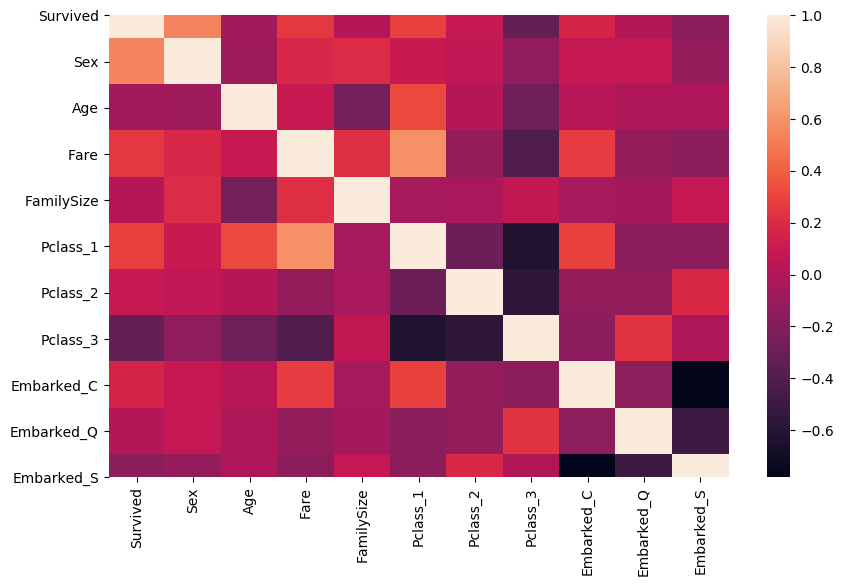

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df_sub_other.corr())
plt.show()

# Machine Learning

## Linear Models

In [12]:
df_sub_linear.groupby("Survived").size()

Survived
0    549
1    342
dtype: int64

In [13]:
342/(549 + 342)

0.3838383838383838

In [14]:
# get pandas columns for prediction
target = df_sub_linear["Survived"]
features = df_sub_linear.drop(["Survived"], axis=1)

# convert to lists/arrays (MUST HAPPEN)
X = np.array(features)
y = np.array(target)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       439
           1       0.77      0.70      0.74       273

    accuracy                           0.81       712
   macro avg       0.80      0.79      0.79       712
weighted avg       0.80      0.81      0.80       712


Confusion Matrix - In Sample
[[382  57]
 [ 81 192]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179


Confusion Matrix - Out Sample
[[96 14]
 [23 46]]


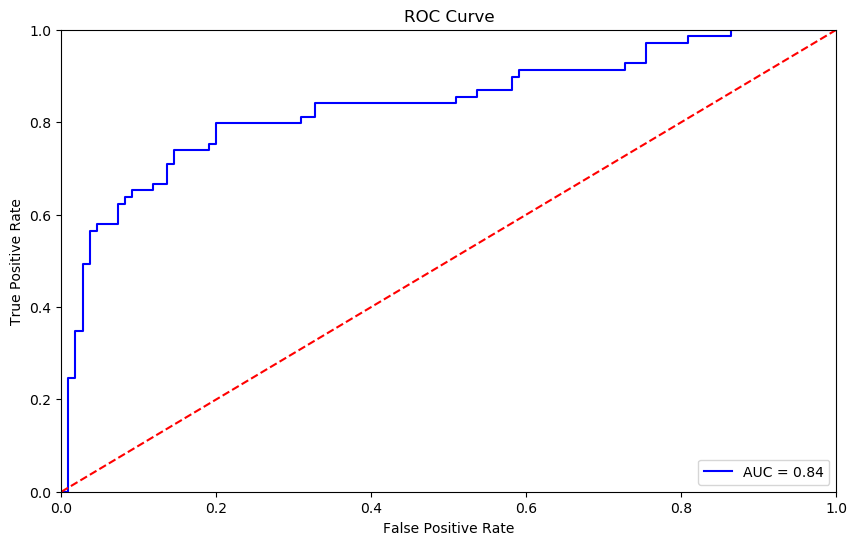

In [15]:
# train the model
reg = LogisticRegression()
reg.fit(X_train, y_train)

#get predictions
in_sample_preds = reg.predict(X_train)
out_sample_preds = reg.predict(X_test)

# get evaluation report
print("Logistic Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = reg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Other Models

In [16]:
# get pandas columns for prediction
target = df_sub_other["Survived"]
features = df_sub_other.drop(["Survived"], axis=1)

# convert to lists/arrays (MUST HAPPEN)
X = np.array(features)
y = np.array(target)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Decision Tree Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       439
           1       1.00      0.96      0.98       273

    accuracy                           0.98       712
   macro avg       0.99      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712


Confusion Matrix - In Sample
[[438   1]
 [ 11 262]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       110
           1       0.73      0.74      0.73        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


Confusion Matrix - Out Sample
[[91 19]
 [18 51]]


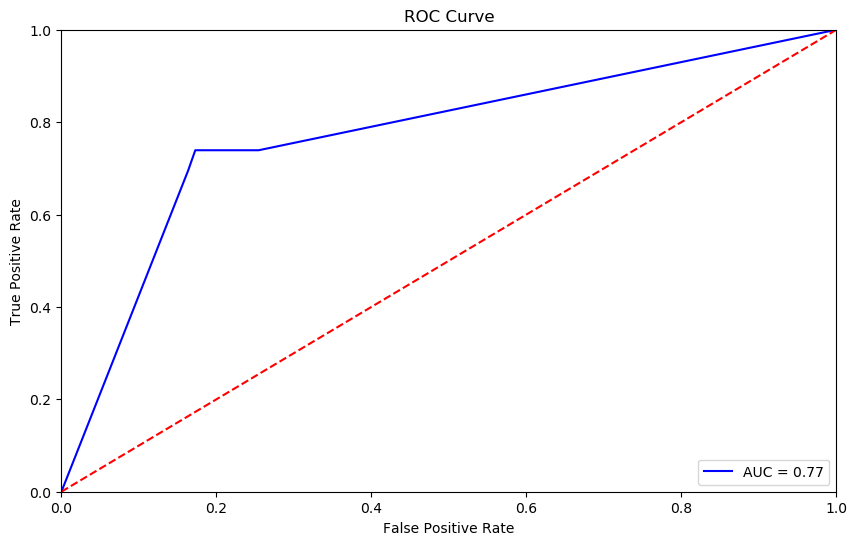

In [17]:
# train the model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

#get predictions
in_sample_preds = dt.predict(X_train)
out_sample_preds = dt.predict(X_test)

# get evaluation report
print("Decision Tree Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = dt.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       439
           1       0.99      0.96      0.98       273

    accuracy                           0.98       712
   macro avg       0.99      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712


Confusion Matrix - In Sample
[[437   2]
 [ 10 263]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       110
           1       0.80      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179


Confusion Matrix - Out Sample
[[98 12]
 [20 49]]


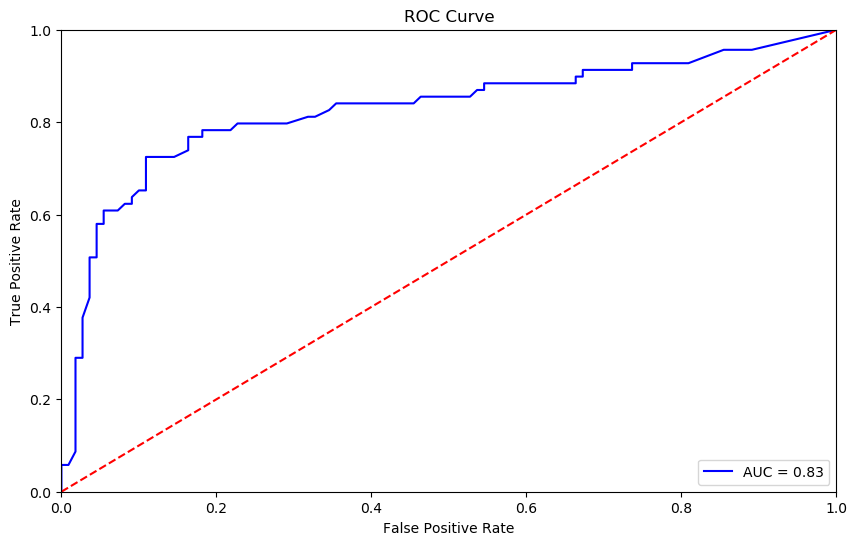

In [18]:
# train the model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

#get predictions
in_sample_preds = rf.predict(X_train)
out_sample_preds = rf.predict(X_test)

# get evaluation report
print("Random Forest Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = rf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Ada Boost Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       439
           1       0.81      0.78      0.79       273

    accuracy                           0.84       712
   macro avg       0.84      0.83      0.83       712
weighted avg       0.84      0.84      0.84       712


Confusion Matrix - In Sample
[[389  50]
 [ 61 212]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       110
           1       0.71      0.71      0.71        69

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179


Confusion Matrix - Out Sample
[[90 20]
 [20 49]]


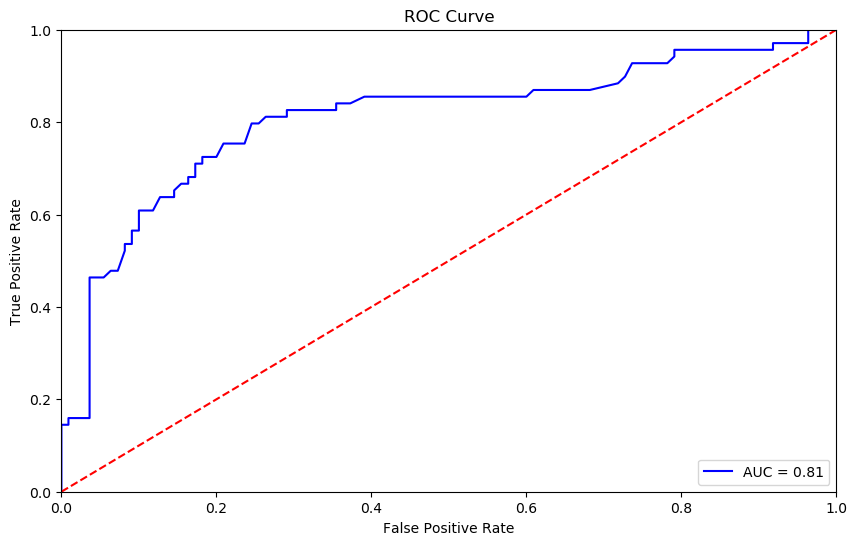

In [19]:
# train the model
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)

#get predictions
in_sample_preds = ada.predict(X_train)
out_sample_preds = ada.predict(X_test)

# get evaluation report
print("Ada Boost Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = ada.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

GradientBoosting Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       439
           1       0.92      0.83      0.87       273

    accuracy                           0.91       712
   macro avg       0.91      0.89      0.90       712
weighted avg       0.91      0.91      0.91       712


Confusion Matrix - In Sample
[[420  19]
 [ 47 226]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       110
           1       0.81      0.67      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix - Out Sample
[[99 11]
 [23 46]]


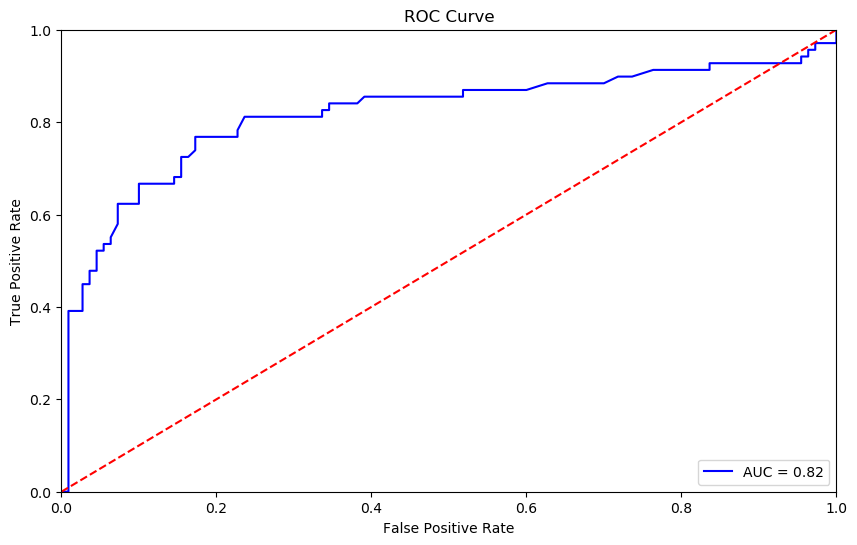

In [20]:
# train the model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

#get predictions
in_sample_preds = gb.predict(X_train)
out_sample_preds = gb.predict(X_test)

# get evaluation report
print("GradientBoosting Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = gb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

XG Boost Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       439
           1       0.98      0.95      0.96       273

    accuracy                           0.97       712
   macro avg       0.97      0.97      0.97       712
weighted avg       0.97      0.97      0.97       712


Confusion Matrix - In Sample
[[434   5]
 [ 14 259]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.75      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix - Out Sample
[[93 17]
 [19 50]]


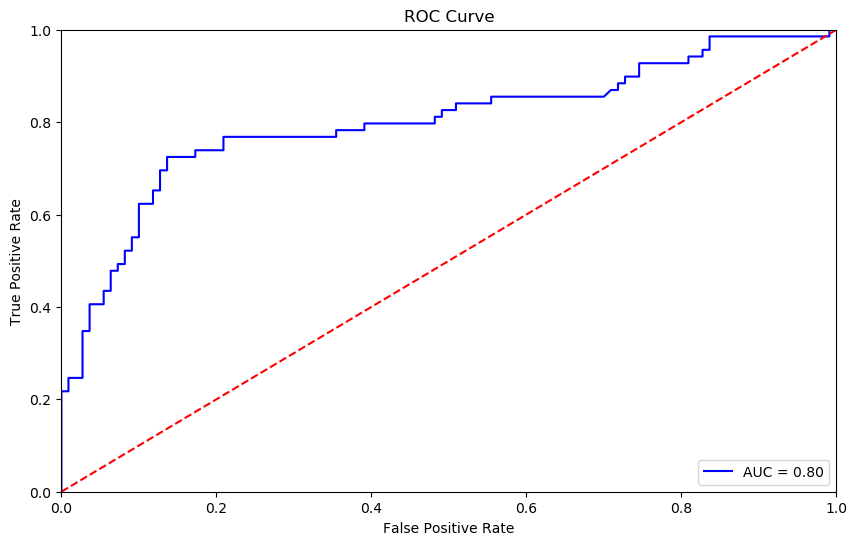

In [21]:
# train the model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

#get predictions
in_sample_preds = xgb.predict(X_train)
out_sample_preds = xgb.predict(X_test)

# get evaluation report
print("XG Boost Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = xgb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

KNN Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       439
           1       0.71      0.59      0.64       273

    accuracy                           0.75       712
   macro avg       0.74      0.72      0.73       712
weighted avg       0.75      0.75      0.75       712


Confusion Matrix - In Sample
[[375  64]
 [113 160]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       110
           1       0.57      0.46      0.51        69

    accuracy                           0.66       179
   macro avg       0.64      0.62      0.63       179
weighted avg       0.65      0.66      0.65       179


Confusion Matrix - Out Sample
[[86 24]
 [37 32]]


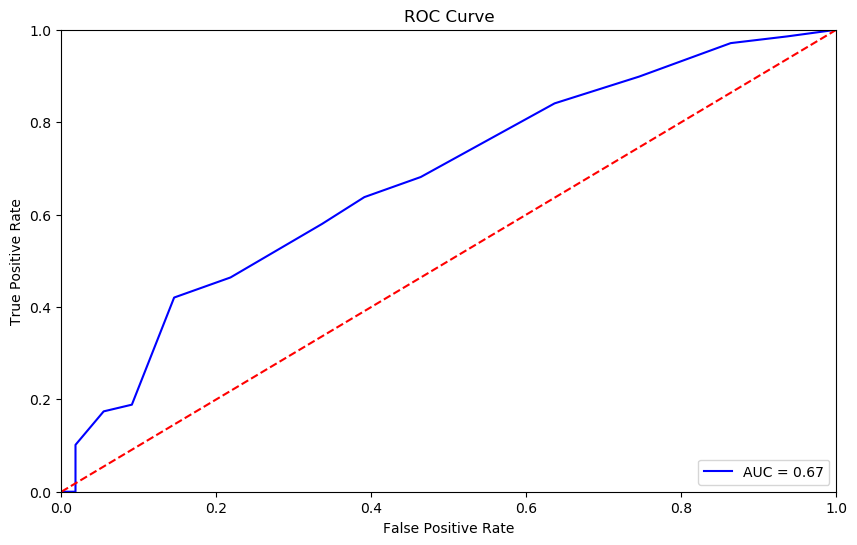

In [22]:
# train the model
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

#get predictions
in_sample_preds = knn.predict(X_train)
out_sample_preds = knn.predict(X_test)

# get evaluation report
print("KNN Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = knn.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

SVM Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       439
           1       0.72      0.35      0.47       273

    accuracy                           0.70       712
   macro avg       0.71      0.63      0.63       712
weighted avg       0.70      0.70      0.67       712


Confusion Matrix - In Sample
[[402  37]
 [177  96]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.64      0.86      0.74       110
           1       0.52      0.23      0.32        69

    accuracy                           0.62       179
   macro avg       0.58      0.55      0.53       179
weighted avg       0.59      0.62      0.58       179


Confusion Matrix - Out Sample
[[95 15]
 [53 16]]


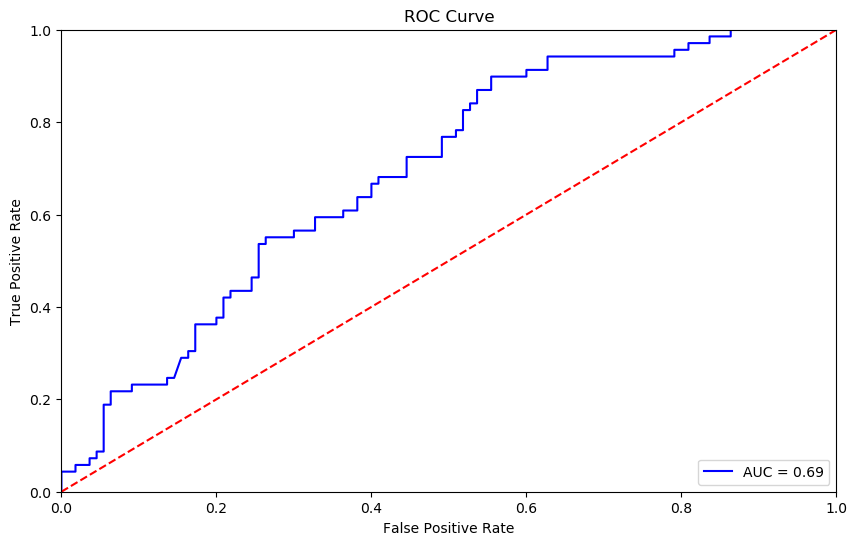

In [23]:
# train the model
svm = SVC(probability=True)
svm.fit(X_train, y_train)

#get predictions
in_sample_preds = svm.predict(X_train)
out_sample_preds = svm.predict(X_test)

# get evaluation report
print("SVM Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = svm.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model Selection

In [ ]:
# I choose Ada Boost because Ed told me to

Ada Bood Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       549
           1       0.78      0.76      0.77       342

    accuracy                           0.83       891
   macro avg       0.82      0.82      0.82       891
weighted avg       0.83      0.83      0.83       891


Confusion Matrix - In Sample
[[477  72]
 [ 81 261]]




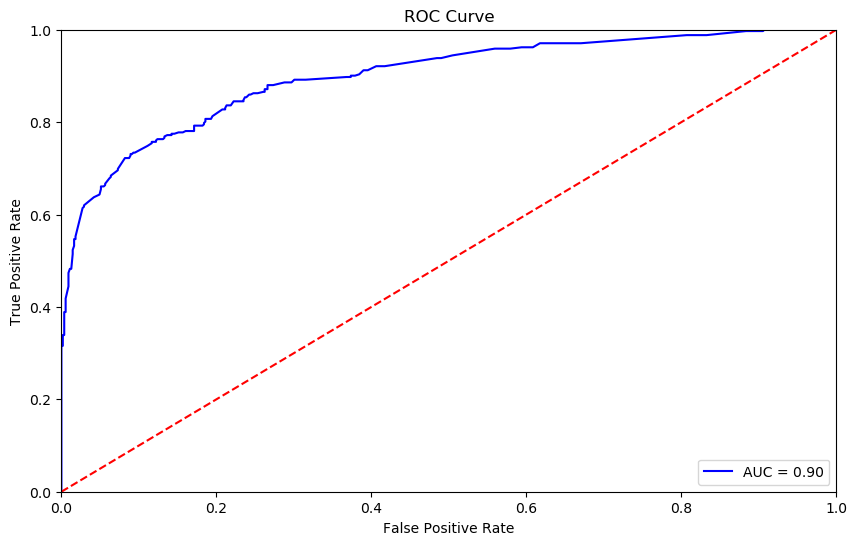

In [24]:
# train the model
ada = AdaBoostClassifier(random_state=42)
ada.fit(X, y)

#get predictions
in_sample_preds = ada.predict(X)

# get evaluation report
print("Ada Bood Classifier:")
print("Classification Report - In Sample")
print(classification_report(y, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y, in_sample_preds))
print()
print()

# get probabilities for the ROC curve
preds = ada.predict_proba(X)[:,1]
fpr, tpr, threshold = roc_curve(y, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:
import pickle

In [26]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(ada, open(filename, 'wb'))

# Prepare the Testing Data

In [27]:
test_df = pd.read_csv("test.csv")
test_df["FamilySize"] = test_df.SibSp + test_df.Parch + 1
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3


In [28]:
test_df["Sex"] = [0 if x == "male" else 1 for x in test_df.Sex]

test_df_sub = test_df.loc[:, ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize"]]

test_df_sub.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,0,34.5,7.8292,Q,1
1,3,1,47.0,7.0000,S,2
2,2,0,62.0,9.6875,Q,1
3,3,0,27.0,8.6625,S,1
4,3,1,22.0,12.2875,S,3


In [29]:
# Fill NA
test_df_sub["Age"] = test_df_sub.Age.fillna(df_sub.Age.mean()) #fill with average of the TRAINING set
test_df_sub["Fare"] = test_df_sub.Fare.fillna(df_sub.Fare.mean()) #fill with average of the TRAINING set
test_df_sub["Embarked"] = test_df_sub.Embarked.fillna("S") # most common value in the TRAINING set

test_df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   Fare        418 non-null    float64
 4   Embarked    418 non-null    object 
 5   FamilySize  418 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 19.7+ KB


In [30]:
test_df_sub["Pclass"] = [str(x) for x in test_df_sub.Pclass]

# get dums
dums_test = pd.get_dummies(test_df_sub.loc[:, ["Pclass", "Embarked"]], drop_first=False)

#concat
dums_test_sub = pd.concat([test_df_sub, dums_test], axis=1)

#drop original
dums_test_sub = dums_test_sub.drop(["Pclass", "Embarked"], axis=1)

dums_test_sub.head()

,Sex,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,34.5,7.8292,1,0,0,1,0,1,0
1,1,47.0,7.0000,2,0,0,1,0,0,1
2,0,62.0,9.6875,1,0,1,0,0,1,0
3,0,27.0,8.6625,1,0,0,1,0,0,1
4,1,22.0,12.2875,3,0,0,1,0,0,1


In [31]:
filename = 'finalized_model.sav'
ada_load = pickle.load(open(filename, 'rb'))

In [32]:
X = np.array(dums_test_sub)
preds = ada_load.predict_proba(X)
preds_singular = ada_load.predict(X)

preds_singular[0]

0

In [33]:
submission = pd.DataFrame()
submission["PassengerId"] = test_df.PassengerId
submission['Survived'] = preds_singular

submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [34]:
submission.to_csv("submission.csv", index=False)

In [36]:
content = {'sex_flag': '0', 'age': '35', 'fare': '50', 'familySize': '3', 'p_class': '2', 'embarked': 'Q'}
content

{'sex_flag': '0',
 'age': '35',
 'fare': '50',
 'familySize': '3',
 'p_class': '2',
 'embarked': 'Q'}

In [37]:
# parse
sex_flag = int(content["sex_flag"])
age = float(content["age"])
fare = float(content["fare"])
familySize = int(content["familySize"])
p_class = int(content["p_class"])
embarked = content["embarked"]

In [38]:
pclass_1 = 0
pclass_2 = 0
pclass_3 = 0

embarked_c = 0
embarked_q = 0
embarked_s = 0

In [39]:
# parse pclass
if (p_class == 1):
    pclass_1 = 1
elif (p_class == 2):
    pclass_2 = 1
elif (p_class == 3):
    pclass_3 = 1
else:
    pass

# parse embarked
if (embarked == "C"):
    embarked_c = 1
elif (embarked == "Q"):
    embarked_q = 1
elif (embarked == "S"):
    embarked_s = 1
else:
    pass

In [40]:
input_pred = [[sex_flag, age, fare, familySize, pclass_1, pclass_2, pclass_3, embarked_c, embarked_q, embarked_s]]
input_pred

[[0, 35.0, 50.0, 3, 0, 1, 0, 0, 1, 0]]

In [42]:
pd.DataFrame(input_pred, columns=dums_test_sub.columns)

,Sex,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,35.0,50.0,3,0,1,0,0,1,0


In [43]:
filename = 'finalized_model.sav'
ada_load = pickle.load(open(filename, 'rb'))

In [44]:
X = np.array(input_pred)
preds = ada_load.predict_proba(X)
preds_singular = ada_load.predict(X)

In [45]:
preds

array([[0.50177689, 0.49822311]])

In [46]:
preds_singular

array([0], dtype=int64)